## 확률(Probability)

주사위를 던져서 나올 수 있는 숫자는 1,2,3,4,5,6이고 각 숫자가 나올 확률은 1/6로 모두 같다.   
동전 10번 던져서 앞면은 0~10번 나올 수 있으며 각각의 확률은 계산해 보면 각각   
0.001, 0.01, 0.044, 0.117, 0.205, 0.246, 0.205, 0.117, 0.044, 0.01, 0.001 이다.   
두 경우 모두 일어날 수 있는 사건이 6개, 11개로 정해져 있으며 각각에 대한 확률을 구할 수 있고 확률의 합은 1이 된다.

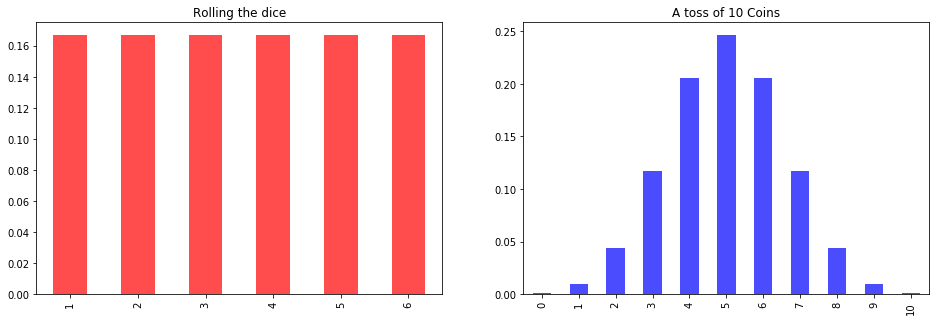

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

y1 = [1/6,1/6,1/6,1/6,1/6,1/6]
s1 = pd.Series(y1, index=[1,2,3,4,5,6])
y2 = [0.001, 0.01, 0.044, 0.117, 0.205, 0.246, 0.205, 0.117, 0.044, 0.01, 0.001]
s2 = pd.Series( y2, index=[0,1,2,3,4,5,6,7,8,9,10])

axes[0].set_title('Rolling the dice')
axes[1].set_title('A toss of 10 Coins')
s1.plot(kind='bar', ax=axes[0],  color='r', alpha=0.7)
s2.plot(kind='bar', ax=axes[1],  color='b', alpha=0.7)


## 연속 사건의 확률

### 특정 사건의 확률은 모두 0

1~6사이의 숫자 중 랜덤으로 아무 숫자나 뽑는다고 했을때 이때 정확히 5가 뽑힐 확률은??   
1~6사이의 숫자는 무한개의 숫자가 있으니 5를 뽑을 확률은 1/무한대 = 0  
이러한 연속사건의 경우 특정 숫자가 나올 확률을 말하는 것은 의미가 없어 그 대안으로 숫자가 특정 구간에 속할 확률을 찾는다.

### 특정 구간에 속할 확률: 확률밀도함수(Probability Density Function, PDF)
1~6사이의 숫자 중 정확히 5가 뽑힐 확률은 0지만 4에서 5사이의 숫자가 뽑힐 확률은 20%이다.  
전체 구간의 길이는 6-1=5이고 4에서 5사이 구간의 길이는 1이기 때문이다. 마찬가지의 논리로 2에서 4사이의 숫자가 뽑힐 확률은 2/5=40%가 된다.   
이처럼 우리는 특정 사건에 대한 확률 대신 특정 구간에 속할 확률을 구함으로서 간접적으로 특정 사건의 확률에 대한 감을 잡을 수 있다.  
이것을 설명하는 곡선이 바로 확률밀도함수(Probability Density Function: PDF)이다.  
PDF는 특정 구간에 속할 확률을 계산하기 위한 함수이며 함수를 나타내는 <그래프에서 특정 구간에 속한 넓이="특정" 구간에 속할 확률>이 되게끔 정한 함수이다.  
아래 그림에서 PDF의 값은 1에서 6사이에서는 전부 0.2이고 나머지 구간에서는 전부 0인데, 이는 1에서 6사이의 숫자를 뽑는 상황을 그림으로 나타낸 것이다.  
1보다 작거나 6보다 큰 숫자를 뽑을 수는 없으므로 이에 해당하는 확률밀도함수의 함수의 y값은 전부 0이고, 1~6사이에서는 무작위로 숫자를 뽑으므로 y값은 전부 같다.  
전체 확률은 1이므로 그림의 직사각형의 넓이는 1이되고 y값은 전부 0.2가 되며, 이를 바탕으로 2에서 4사이의 숫자가 뽑힐 확률을 계산하면 2×0.2=0.4로 40%가 된다. 


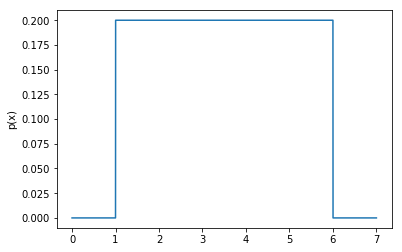

In [3]:
import scipy
import numpy as np

def f_res(i):
    if i < 1 : t = 0
    elif i >6 : t = 0
    else : t=0.2
    
    return t

x = np.arange(0,7,0.0001)
y = list(map(f_res, x))

plt.plot(x, y)
plt.ylabel("p(x)")
plt.show()

아래 그림은 정확한 의미는 잘 몰랐더라도 모양은 많이 봤을 정규분포(Normal distribution)이며,  
그 중에서도 가장 흔히 쓰이는 평균 0, 분산 1인 표준정규분포(Standard normal distribution)를 나타내고 있다.  
x가 -1.96~1.96에 안에 있을 확률이 95%임이 잘 알려져 있다.

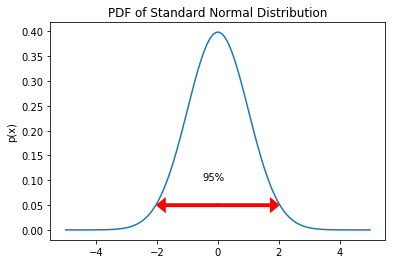

In [4]:
import scipy
from scipy.stats import norm
mu = 0
std = 1
rv = scipy.stats.norm(mu, std)
xx = np.linspace(-5, 5, 100)
plt.plot(xx, rv.pdf(xx))
plt.ylabel("p(x)")
plt.arrow(0, 0.05, 1.96, 0, lw=3, color='r', 
          head_width=0.02, head_length=0.2, length_includes_head=True)
plt.arrow(0, 0.05, -1.96, 0, lw=3, color='r', 
          head_width=0.02, head_length=0.2, length_includes_head=True)
plt.title("PDF of Standard Normal Distribution")
plt.text(-0.5, 0.1, "95%")
plt.show()

## 특정 사건이 일어날 가능성을 비교할 수는 없을까? 

연속사건에서는 특정 사건이 일어날 확률이 전부 0으로 계산되기 때문에 사건들이 일어날 가능성을 비교하는 것이 불가능하며, 가능도라는 개념을 적용해야 이를 비교할 수 있다.   
위 그림들에서 y값을 가능도로 생각하면 된다. 즉, y값이 높을수록 일어날 가능성이 높은 사건이라는 것이다.  
주사위나 동전을 던지는 경우는 y값이 각 사건이 일어날 확률을 나타내었으므로 가능도=확률이 되어, 확률이 높을수록 일어날 가능성이 높은 사건이 된다.  
한편 정규분포같이 연속사건인 경우는 PDF의 값이 바로 y가 되며 0에 해당하는 PDF값이 0.4로 1 에 해당하는 PDF값인 0.24보다 높아  
0 근처의 숫자가 나올 가능성이 1 근처의 숫자가 나올 가능성보다 높다고 할 수 있으며,  
0이 나올 확률과 1이 나올 확률이 모두 0인 것과는 대조적이다. 이를 정리하면 가능도의 직관적인 정의는 다음과 같다.

가능도의 직관적인 정의 : 확률분포함수의 y값
셀 수 있는 사건: 가능도 = 확률
연속 사건: 가능도 ≠ 확률, 가능도 = PDF값

## 결합확률 
두가지 이상의 사건이 동시에 발생하는 확률
P(A,B) = P(A|B)P(B)

### 독립 사건일 경우의 조건부 확률
P(A,B) = P(A)P(B)

## 베이즈 정리와 조건부 확률

조건부 확률 : 사건 A가 일어나는 경우 사건 B가 일어날 확률
베이즈 정리 유도  
P(A,B) = P(B,A)  
P(A)P(B|A) = P(B)P(A|B)  

              P(A|B)P(B)      사전확률 * 우도     
   P(B|A) =  ----------    = ---------------     
                P(A)              P(A)   
사건 A가 먼저 일어난 후 사건 B가 일어날 때
P(B)   : 사전확률, 이미 알고 있는 사건의 확률
P(A|B) : 사건 B가 일어난 후 사건 A가 일어날 확률
= 우도  : 이미 알고 있는 사건이 발생했다는 조건하에 다른 사건이 발생할 확률
P(B|A) : 사후확률, 사전확률과 우도를 통해 알게되는 조건부 확률

### 베이즈 정리란
조건부 확률을 이용하여 또 다른 형태의 조건부 확률을 계산하는 방법을 설명    
항상 전제=원인인 것은 아니다. 사실 전제라는 것은 원인이라기 보다는 어떤 결론을 내리기 전 그 결론의 근거를  미리 정해두는 것이다.   
따라서 나중에 일어나는 사건도 그 사건을 근거로 하는 합리적인 결론을 내릴수 있다면 나중에 일어난 사건도 앞서 일어나는 사건의 전제로   
사용할 수 있다. 베이즈 정리는 이러한 사후 확률의 의미를 설명하기 위해 만들어진 정리이다.   

### 베이즈 정리가 구하려고 하는 것
우변의 식을 보면 먼저 일어나는 사건 B를 전제로 한 확률인 P(A|B) 와 사전 확률 P(B)의 곱으로 되어 있다
즉 결과를 전제로 한 확률을 원인을 전제로 한 확률로 바꾸어 표현하고 있다.   
이렇게 베이즈 정리는 앞어 일어나는 사건을 전제로 하는 조건부 확률과 사전확률을 이용해 사후확률을 구하는 법을 설명한다.

### 사후 확률의 의미와 목적
* 먼저 일어나는 사건을 전제로 하는 조건부의 의미   
 : 어떤 사건이 만들어 놓은 상황에서, 그 사건이 일어난 후 앞으로 일어나게 될 다른 사건의 가능성을 구하는 것이다.   
 
* 사후확률이란 원인들의 영향을 비교하는 것
 사건 B 또는 C가 원인이 되어 일어나는 사건 A
 그리고 사건 A가 100번 일어날 때까지 매번 사건 B나 C 중 어느 사건이 원인이 되었는지 조사 해보니   
 사건 B가 원인 인것이 40번, 사건 C가 원인 인것이 60번 이었다.   
 이때,
 1. 사건 A가 일어났을때, 사건 B가 원인일 확률
   40/ 100 = 2/5 => P(B|A)
 2. 사건 A가 일어났을때, 사건 C가 원인일 확률
   60/ 100 = 3/5 => P(C|A)

 따라서 사후확률 P(B|A) 는 사건 A가 일어났을 때, 다른 여러가지 원인들과 비교하여 
 사건 B가 얼마나 사건 A가 발생하는데 영향을 주었는지를 평가
   

# 나이브 베이즈 알고리즘

나이브 베이즈 분류 알고리즘은 데이터를 나이브하게 독립적인 사건으로 가정하고,    
이 독립 사건들을 베이즈 이론에 대입시켜 가장 높은 확률의 레이블로 분류하는 알고리즘

A를 레이블, B를 데이터의 특징으로 대입해 보면 다음과 같은 공식이 유도된다.

P(레이블|특징) = P(특징|레이블)P(레이블)/P(특징)


### 나이브 베이즈 알고리즘의 기초 응용 사례

In [5]:
import pandas as pd

beer_order = [
                {'시간': '오전', '맥주': '주문안함'},
                {'시간': '오전', '맥주': '주문안함'},
                {'시간': '점심', '맥주': '주문함'},
                {'시간': '점심', '맥주': '주문안함'},
                {'시간': '점심', '맥주': '주문안함'},
                {'시간': '저녁', '맥주': '주문함'},
                {'시간': '저녁', '맥주': '주문함'},
                {'시간': '저녁', '맥주': '주문함'},
                {'시간': '저녁', '맥주': '주문안함'},
                {'시간': '저녁', '맥주': '주문안함'}
    
             ]
df = pd.DataFrame(beer_order)
df

,맥주,시간
0,주문안함,오전
1,주문안함,오전
2,주문함,점심
3,주문안함,점심
4,주문안함,점심
5,주문함,저녁
6,주문함,저녁
7,주문함,저녁
8,주문안함,저녁
9,주문안함,저녁


치킨가게에 저녁에 손님이 한명 와서 주문을 할때, 이 경우 나이브 베이즈 공식에 따르면 맥주를 주문할 확률

P(주문|저녁) = P(저녁|주문)P(주문)/P(저녁) = 3/4*4/10 / 5/10 =0.6

In [6]:
df['성인여부']= ['성인','미성년자','성인','미성년자','미성년자','성인','성인','성인','성인','미성년자']

In [7]:
df

,맥주,시간,성인여부
0,주문안함,오전,성인
1,주문안함,오전,미성년자
2,주문함,점심,성인
3,주문안함,점심,미성년자
4,주문안함,점심,미성년자
5,주문함,저녁,성인
6,주문함,저녁,성인
7,주문함,저녁,성인
8,주문안함,저녁,성인
9,주문안함,저녁,미성년자


성인여부라는 특성을 하나더 추가했다.  
1. 저녁에 성인손님이 와서 맥주를 주문할 확률은?   
P(주문|저녁,성인) = P(저녁,성인|주문)*P(주문)/P(저녁,성인)
결합확률로 생각해보면  
P(주문|저녁,성인) = P(저녁|주문)*P(성인|주문)*P(주문)/P(저녁)*P(성인)    

2. 저녁에 성인이 치킨집에 와서 맥주를 주문하지 않을 확률??   
P(주문안함|저녁,성인) = P(저녁|주문안함)*P(성인|주문안함)*P(주문안함)/P(저녁)*P(성인)    

공통분모를 제거하고 계산해 보면   
P(주문|저녁,성인) = P(저녁)*P(성인|주문)*P(주문) = 0.3   
P(주문안함|저녁,성인) = P(저녁)*P(성인|주문안함)*P(주문안함) = 0.066   

=> 성인이 저녁에 치킨집에 올경우 맥주를 주문할것으로 분류 할 수 있다.  

### 가우시안 나이브 베이즈 분류

특징들의 값들이 정규분포(가우시간 분포)돼 있다는 가정하에 조건부 확률을 계산하며,    
연속적인 성질이 있는 특징이 있는 데이터를 분류하는데 적합하다.   
이산적인 데이터는 다항분포 나이브 베이즈, 베르누이 나이브 베이즈 중 하나를 사용하면 된다.   

### 다항 분포 나이브 베이즈

데이터의 특징이 출현 횟수로 표현됐을 때 사용한다.   
예를들어 주사위 10번을 던졌을때 1이 한번, 2가 두번, 3이 세번, 4가 세번 나왔을 경우   
주사위를 10번 던진 결과 데이터를 (1,2,3,4,0,0)
각 인덱스는 주사위의 면을 뜻하며 데이터의 숫자는 출현 횟수를 나타낸다.   
이런 식으로 데이터의 출현 횟수에 따라 값을 달리한 데이터에는 다항 분포 나이브 베이즈 모델을 사용한다.  

### 베르누이 나이브 베이즈 모델

데이터의 특징이 0 또는 1로 표혔됐을때 사용한다.
예를들어 주사위 10번을 던졌을때 1이 한번, 2가 두번, 3이 세번, 4가 세번 나왔을 경우   
주사위를 10번 던진 결과 데이터를 (1,1,1,1,0,0)
각 인덱스는 주사위의 면을 뜻하며 데이터의 숫자는 출현 여부를 나타낸다.   
이런 식으로 데이터의 출현 여부에 따라 1 또는 0으로 구분 됐을때 베르누이 나이브 베이즈 모델을 사용한다.  


### 나이브 베이즈의 장점과 단점

장점   
1. 모든 데이터의 특징이 독립적인 사건이라는 나이브 가정에도 불구하고 실전에서 높은 정확도를 보이며,  
   특히 문서 분류 및 스팸 메일 분류에 강한 면모를 보입니다.
2. 나이브 가정에 의해 계산 속도가 다른 모델들에 비해 상당히 빠르다.  

단점   
1. 모든 데이터의 특징을 독립적인 사건이라고 가정하는 것은 문서 분류에 적합할지는 모르나 다른 분류 모델에서는 제약이 될 수 있다.